To make good webpage from jupyter notebook: http://predictablynoisy.com/blogging-in-wordpress-with-ipython-jupyter-notebooks/

# Atmospheric CO<sub>2</sub>

What is CO2? Why is it important?

Look into CDIAC for awesome free data:
http://cdiac.ornl.gov/


### Is atmospheric CO<sub>2</sub>'s partial pressure currently increasing?

http://climate.nasa.gov/vital-signs/carbon-dioxide/

In [1]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import time
import os
import pandas as pd
import numpy as np
import urllib

matplotlib.style.use('ggplot')

In [2]:
file = urllib.URLopener()
txtfile = file.retrieve('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt','co2_mm_mlo.txt')
print 'co2_mm_mlo.txt checked out on '+time.ctime(os.path.getmtime('co2_mm_mlo.txt'))+'.'

content = []
with open('co2_mm_mlo.txt', 'r+') as f:
    content=f.readlines()

co2_mm_mlo.txt checked out on Wed Jan 20 16:26:39 2016.


In [4]:
content[:100]

['# --------------------------------------------------------------------\n',
 '# USE OF NOAA ESRL DATA\n',
 '# \n',
 '# These data are made freely available to the public and the\n',
 '# scientific community in the belief that their wide dissemination\n',
 '# will lead to greater understanding and new scientific insights.\n',
 '# The availability of these data does not constitute publication\n',
 '# of the data.  NOAA relies on the ethics and integrity of the user to\n',
 '# insure that ESRL receives fair credit for their work.  If the data \n',
 '# are obtained for potential use in a publication or presentation, \n',
 '# ESRL should be informed at the outset of the nature of this work.  \n',
 '# If the ESRL data are essential to the work, or if an important \n',
 '# result or conclusion depends on the ESRL data, co-authorship\n',
 '# may be appropriate.  This should be discussed at an early stage in\n',
 '# the work.  Manuscripts using the ESRL data should be sent to ESRL\n',
 '# for 

So here's the data! What did I do to show it to you? Well, you can look directly at the code to see what I did. Without going into the code's details, I downloaded the text file locally from NOAA's website, then I transfered each line of the text file in a python list. That list is what was printed to the screen.

You should definitely read a bit of the documentation provided in the header (first lines) of the data file. At least understand how the measurements are made. I've also found this [webpage](http://www.esrl.noaa.gov/gmd/ccgg/about/co2_measurements.html) from NOAA that explains how they measure CO<sub>2</sub> at the Mauna Loa observatory. Essentially, scientists take air samples and measure the absorbance of light emitted at certain wavelengths to determine the concentration of CO<sub>2</sub> molecules in the air sample.

First thing you'll notice is that there's a '\n\' at the end of each line; this is just an artefact of how a text file stores the information that 'there is a next line'. Since we'll be converting everything back to a text file later, let's ignore the '\n\'.

Second thing you'll notice is that the text file starts with a large header filled with information about the following data. I encourage you to read it. This way, you can get a good idea of how the data was obtained or you can usually, at least, get a link to another webpage/publication where you can find all the data's information.

Last thing to notice is the data itself. The data is arranged in columns separated by spaces. Notice how there are either 2,3,4,5 or 6 spaces delimiting each column. That's not ideal! We will need to clean up the data before we can import it into a pandas dataframe for easy plotting and calculations.

Let's standardize all spaces between data columns to 4 spaces.

In [5]:
def standardize_txt(in_txt,out_txt,startLine):
    with open(in_txt, 'r+') as f:
        content=f.readlines()
        #standardize delimiters
        for i in range(startLine,len(content)):
            content[i]=content[i].replace(' ','DUMMY')
            content[i]=content[i].replace('DUMMYDUMMYDUMMYDUMMYDUMMYDUMMY','    ')
            content[i]=content[i].replace('DUMMYDUMMYDUMMYDUMMYDUMMY','    ')
            content[i]=content[i].replace('DUMMYDUMMYDUMMYDUMMY','    ')
            content[i]=content[i].replace('DUMMYDUMMYDUMMY','    ')
            content[i]=content[i].replace('DUMMYDUMMY','    ')
            content[i]=content[i].replace('DUMMY','    ')
            f.close()
        
    with open(out_txt, 'w') as f:
        f.writelines(content)
        f.close()
        
standardize_txt('co2_mm_mlo.txt','co2_mm_mlo_stddel.txt',72)

In [6]:
content[:100]

['# --------------------------------------------------------------------\n',
 '# USE OF NOAA ESRL DATA\n',
 '# \n',
 '# These data are made freely available to the public and the\n',
 '# scientific community in the belief that their wide dissemination\n',
 '# will lead to greater understanding and new scientific insights.\n',
 '# The availability of these data does not constitute publication\n',
 '# of the data.  NOAA relies on the ethics and integrity of the user to\n',
 '# insure that ESRL receives fair credit for their work.  If the data \n',
 '# are obtained for potential use in a publication or presentation, \n',
 '# ESRL should be informed at the outset of the nature of this work.  \n',
 '# If the ESRL data are essential to the work, or if an important \n',
 '# result or conclusion depends on the ESRL data, co-authorship\n',
 '# may be appropriate.  This should be discussed at an early stage in\n',
 '# the work.  Manuscripts using the ESRL data should be sent to ESRL\n',
 '# for 

That's better! There is now a standard delimiter of 4 spaces. Note that if we had wanted to import the data into Excel, this problem would not have presented itself, because Excel can recognize different column delimiters.

So, let's import the data into a pandas dataframe.

In [7]:
# Now that the file has been cleaned up, we can easily read it into a pandas dataframe.
co2_maunaLoa = pd.read_csv('co2_mm_mlo_stddel.txt',sep='    ', engine='python', comment='#', \
na_values=[-99.99,-1],names=['Year','Month','Decimal Date','ML Monthly Average','ML Interpolated','ML Trend','#Days'], \
parse_dates=['Decimal Date'], index_col=['Decimal Date'])

In [8]:
print type(co2_maunaLoa)
co2_maunaLoa.head()

<class 'pandas.core.frame.DataFrame'>


,Year,Month,ML Monthly Average,ML Interpolated,ML Trend,#Days
Decimal Date,,,,,,
1958.208,1958,3,315.71,315.71,314.62,NaN
1958.292,1958,4,317.45,317.45,315.29,NaN
1958.375,1958,5,317.50,317.50,314.71,NaN
1958.458,1958,6,NaN,317.10,314.85,NaN
1958.542,1958,7,315.86,315.86,314.98,NaN


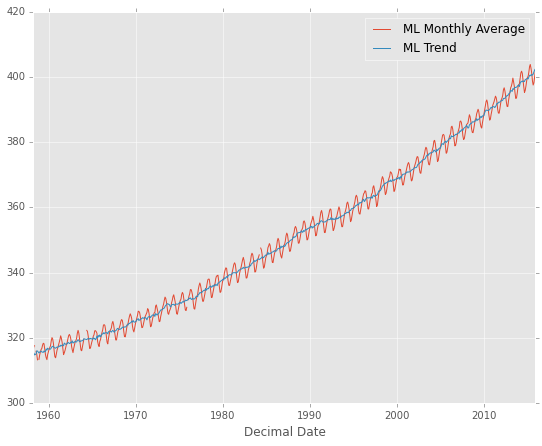

In [9]:
ts = pd.DataFrame(co2_maunaLoa, columns=['ML Monthly Average','ML Trend'])
ts.plot(kind='line',figsize=(9,7))

Axis and units

ANALYZE CURVE: SEASONNAL CYCLE AND TREND. Who measured it? Is this an exponential rate of increase. Maybe make a log-log graph to check out.

This is only from the Mauna Loa observatory, perched on top of a mountain in Hawai. Does the atmospheric CO<sub>2</sub> measured at Mauna Loa represent the whole Earth's atmospheric CO<sub>2</sub> concentration? It is said that CO<sub>2</sub> is a relatively well mixed gas in the atmosphere. Is this true? We can check it out!

### Is CO<sub>2</sub> well-mixed in the atmosphere?

Does the Mauna Loa record represent the global average or is there a bias? CO<sub>2</sub> is a well-mixed gas, meaning that its concentration doesn't vary too much from place to place in the atmosphere. We could test the validity of this statement by obtaining data from satellite missions that measure atmospheric CO<sub>2</sub> such as [OCO-2](http://oco.jpl.nasa.gov/), [AIRS](http://airs.jpl.nasa.gov/) and [others](https://co2.jpl.nasa.gov/), but the files we would have to download are very large and that isn't pratical in a jupyter notebook like this one. I will simply refer you to this awesome [video](https://www.youtube.com/watch?v=x1SgmFa0r04) of the GEOS-5 model depicting modelled CO<sub>2</sub> concentrations accross the globe during 2006. In the video, you can clearly see that CO<sub>2</sub> varies quite a bit from place to place, especially between the northern and southern hemispheres! But, if we average accross the whole globe, do we get a value that is well represented by that taken at Mauna Loa?

To investigate that last question, we will download another dataset from NOAA. This time, it 

http://www.esrl.noaa.gov/gmd/ccgg/trends/history.html

In [10]:
file = urllib.URLopener()
txtfile = file.retrieve('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_gl.txt','co2_mm_gl.txt')
print 'co2_mm_gl.txt checked out on '+time.ctime(os.path.getmtime('co2_mm_gl.txt'))+'.'

content = []
with open('co2_mm_gl.txt', 'r+') as f:
    content=f.readlines()

co2_mm_gl.txt checked out on Wed Jan 20 16:30:24 2016.


In [11]:
standardize_txt('co2_mm_gl.txt','co2_mm_gl_stddel.txt',58)

In [12]:
co2_global = pd.read_csv('co2_mm_gl_stddel.txt',sep='    ', engine='python', comment='#', \
na_values=[-99.99,-1], names=['Year','Month','Decimal Date','Global Monthly Average','Global Trend'], \
parse_dates=['Decimal Date'], index_col=['Decimal Date'])

In [13]:
print type(co2_global)
co2_global.head()

<class 'pandas.core.frame.DataFrame'>


,Year,Month,Global Monthly Average,Global Trend
Decimal Date,,,,
1980.042,1980,1,338.44,337.82
1980.125,1980,2,339.15,338.10
1980.208,1980,3,339.47,338.13
1980.292,1980,4,339.86,338.25
1980.375,1980,5,340.30,338.78


,Global Monthly Average,ML Monthly Average
Decimal Date,,
1958.208,NaN,315.71
1958.292,NaN,317.45
1958.375,NaN,317.50
1958.458,NaN,NaN
1958.542,NaN,315.86


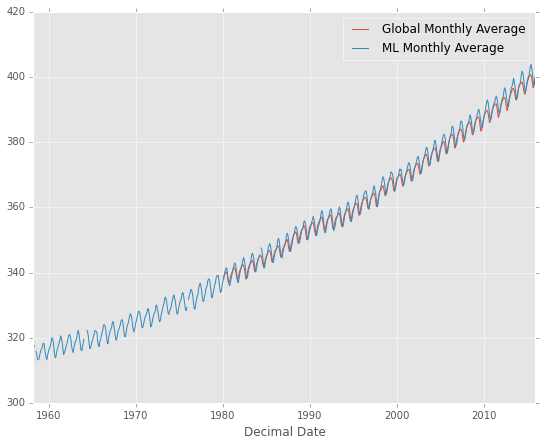

In [14]:
ts_maunaLoa = pd.DataFrame(co2_maunaLoa, columns=['ML Monthly Average'])
ts_global = pd.DataFrame(co2_global, columns=['Global Monthly Average'])

merged = pd.concat([ts_maunaLoa,ts_global])

merged.plot(kind='line',figsize=(9,7))
merged.head()

Here we go! A quick look at both the Mauna Loa monthly average recorded CO<sub>2</sub> and NASA's computed global average CO<sub>2</sub> reveals the similarity of both data. Without being too quantitative, we can confidently say that the CO<sub>2</sub> recorded at Mauna Loa represents the global average within about 5 ppm. There is a small (2-3 ppm) bias towards underestimation during northern hemisphere winters.

So, although the [video](https://www.youtube.com/watch?v=x1SgmFa0r04) of modelled CO<sub>2</sub> in the atmosphere clearly showed a fairly large spatial variations of CO<sub>2</sub> (~10-20 pppm range) over a timescale of days, Mauna Loa just happens to be in a good location to track the global monthly average CO<sub>2</sub> and, therefore, the global change over years.

### How did atmospheric CO<sub>2</sub> vary in the (recent) past?

The Mauna Loa curve is interesting in itself, but we should put it in perspective to have a better idea of the scale of both the CO<sub>2</sub> change and the time in which it happened. To do that, we want data from archives of Earth's past climates: paleodata. So, where could we find information about the composition of an atmospheric trace gas captured thousands of years ago? We are in luck, scientists have already looked thouroughly at this and have found that large ice sheets, such as Antarctica and Greenland, contain trapped bubbles of air in the ice. They were able to date the air bubles by counting of annual layers in the ice, looking for distinct ash layers and various other dating techniques. The result showed that the Antarctic ice core record can extend back to about 800 000 years ago! That should give us a nice enough amount of time to compare to the Mauna Loa record extending only 60 years!

Here, we will use data that comes not from a single ice core, but rather a composite from many ice cores that was assembled last year (2015) with the latest available data. You'll notice that all atmospheric CO<sub>2</sub> data comes from Antarctica; why not use Greenland's data also? It turns out that Greenland is fairly close to continents and this brought in a lot of dust during glacial periods, which interfered with the CO<sub>2</sub> trapped in air bubbles. Antarctica is so remote and isolated that it doesn't have this problem.

By the way, I did undergrad research on paleoclimates of the glacial-interglacial periods. There are many more interesting things to learn from the past, and I might make a notebook or two on that subject later. For now, you just need to know that, for the past 1.8 million years, the Earth's climate has been oscillating between glacial periods lasting about 80 000 years and interglacials lasting about 20 000 years. We are currently in an interglacial period. Here's one site where you can [learn more](https://www.ncdc.noaa.gov/paleo/abrupt/data2.html).

Ok, let's look at the data!

In [15]:
lateQuaternaryCO2 = pd.read_csv('ftp://ftp.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/\
antarctica2015co2composite.txt', sep='\t', engine='python', comment='#', header=1, index_col=['age_gas_calBP'])

In [16]:
print type(lateQuaternaryCO2)
lateQuaternaryCO2.head()

<class 'pandas.core.frame.DataFrame'>


,co2_ppm,co2_1s_ppm
age_gas_calBP,,
-51.03,368.02,0.06
-48.00,361.78,0.37
-46.28,359.65,0.10
-44.41,357.11,0.16
-43.08,353.95,0.04


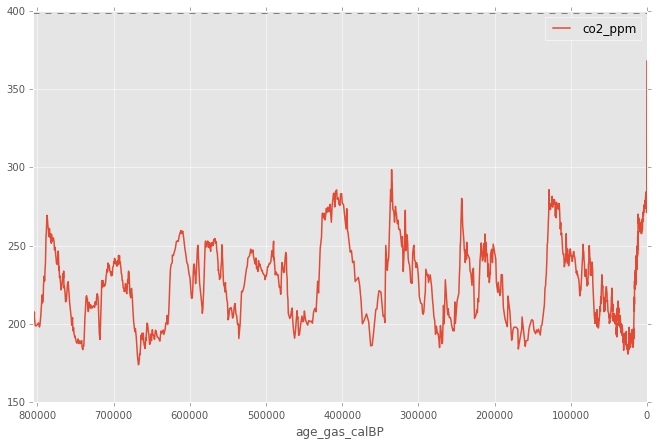

In [17]:
ts = pd.DataFrame(lateQuaternaryCO2['co2_ppm'])
fig = ts[::-1].plot(kind='line', linewidth=1.5, figsize=(11,7))   # The [::-1] is to reverse the time axis
plt.axhline(y=399, xmin=0, xmax=800000, linewidth=1, color = '0.5', ls='dashed')

So, the y-axis is atmospheric CO<sub>2</sub> concentration infered from air bubles trapped in ice and the x-axis is the estimated age of these air bubbles in years before present (BP). Since ice accumulates in nice layers and are preserved for hundreds of thousands of years, we obtain this beautiful timeseries.

Many interesting things to note here! We can see the glacial-interglacial cycles, where CO<sub>2</sub> is ~280 ppm during interglacials and reaches ~180 ppm at the end of glacial periods. Also, the last 4 cycles seem to have a larger amplitude than the previous ones. Whether this is an artefact of the way CO<sub>2</sub> was measured and infered or a real feature of the past 800 000 years would require more investigation.

The latest bubbles recorded in Antarctic ice have a CO<sub>2</sub> concentration of 368 ppm. From the Mauna Loa curve plotted earlier, we can see this is about the value for year 2000. In 2015, we are now at about 400 ppm: the dahsed horizontal line at the top of the plot. It is now obvious that the current CO<sub>2</sub> value is the highest in the past 800 000 years at least. In the last 100 years, atmospheric CO<sub>2</sub> has increased by as much as the whole glacial-interglacial range of about 100 ppm!

We can finally answer our question quite satisfactorily! "Is CO<sub>2</sub> currently increasing?" Yes! But we know even more! Atmospheric CO<sub>2</sub> levels are currently reaching values that are way above the 'normal' glacial-interglacial range. This is definitely a special interglacial period, to say the least! 

Humans really started spreading accross the globe during the last transition from glacial to interglacial about 18-10 ka (thousand years ago). We know that the industrial revolution, starting around the 19th century, was the start of fossil fuel burning. Could this be the source of added atmospheric CO<sub>2</sub>? Alternatively, could increasing CO<sub>2</sub> have nothing to do with humans? This is a topic we could explore eventually, but -*spoiler alert*- it definatelty has something to do with fossil fuel combustion amongst other human-related things. I won't do the math right now, but maybe later if we look at the Earth's carbon cycle.

We could be done now. But there's one last thing I'd like to know: are there any older archives of atmospheric CO<sub>2</sub> to give us a sense of what the Earth was like before the glacial-interglacial periods? The Earth *is* 4.5 billion years old after all! We only looked at the last 0.8 million years, a mere fraction of Earth's history (~0.04% of Earth's history).

### What about CO<sub>2</sub> in the deeper past?

To investigate CO<sub>2</sub> at times older than 800 000 years ago, we have to look at a proxy that dates further back than air bubbles trapped in Antarctic ice. Scientists usually use isotopes in foraminifera, characteristic of stomata in fossilized leaves, fossilized liverworts (a type of moss) and others. These proxies are definitely not as reliable as ice core air bubbles, but they are our best-guess.

Many scientific studies have been published regarding atmospheric CO<sub>2</sub> derived from various proxies over different time periods spanning the Cenozoic (last 65 million years). It would suck to have to compile all of these together right now. Fortunately, David J. Beerling and Dana L. Royer published an article in the journal Nature Geoscience in 2011 where they do precisely that. They compile various atmospheric CO<sub>2</sub> proxies and assess areas where they agree and disagree. Also, following good scientific etiquette, they publish their compiled data for public use! The article can be found [here](http://www.nature.com/ngeo/journal/v4/n7/abs/ngeo1186.html), with a full pdf free version [here](http://droyer.web.wesleyan.edu/Beerling_Royer_Cenozoic_CO2_Nature_Geoscience.pdf) and the official publicly available dataset (which we will use) [here](http://www.nature.com/ngeo/journal/v4/n7/extref/ngeo1186-s1.xls).

In [18]:
cenozoicco2 = pd.read_excel('http://www.nature.com/ngeo/journal/v4/n7/extref/ngeo1186-s1.xls',header=1,\
skip_footer=55,na_values=['flat probability between lower and upper bounds','[unbounded]'])

In [19]:
print type(cenozoicco2)
cenozoicco2.head()

<class 'pandas.core.frame.DataFrame'>


,Method,Study,Age (Ma),"Age, - limit (Ma)","Age, + limit (Ma)",CO2 (ppm),"CO2, - limit (ppm)","CO2, + limit (ppm)"
0,Boron,"Seki et al., 2010",0.00390,NaN,NaN,266.121444,249.174355,283.068533
1,Phytoplankton,"Seki et al., 2010",0.19990,NaN,NaN,288.876169,262.908426,314.843912
2,Phytoplankton,"Seki et al., 2010",0.25345,NaN,NaN,245.768594,223.675890,267.861298
3,Boron,"Seki et al., 2010",0.45630,NaN,NaN,293.382510,265.371289,321.393730
4,Phytoplankton,"Seki et al., 2010",0.45630,NaN,NaN,255.079903,232.150184,278.009622


So far, we could plot everything using the pandas wrapper, but since we now want to color markers according to the string in the 'Method' column and we want colorbars, we will need to use matplotlib directly as it is much more flexible.

In [20]:
cenozoicco2_np, cenozoicco2_np_final = cenozoicco2.values, cenozoicco2.values

# Calculate errors
cenozoicco2_np[:,3] = abs(cenozoicco2_np[:,3]-cenozoicco2_np[:,2])
cenozoicco2_np[:,4] = abs(cenozoicco2_np[:,4]-cenozoicco2_np[:,2])
cenozoicco2_np[:,6] = abs(cenozoicco2_np[:,6]-cenozoicco2_np[:,5])
cenozoicco2_np[:,7] = abs(cenozoicco2_np[:,7]-cenozoicco2_np[:,5])

# Sort by value in 'Method' (column 0)
cenozoicco2_np_final = cenozoicco2_np[cenozoicco2_np[:,0].argsort()]

# Find indexes where value in column 0 changes
print np.where(cenozoicco2_np_final[:-1,0] != cenozoicco2_np_final[1:,0])[0]

print cenozoicco2_np_final[40,:]

[ 16  37  39  40  77 291]
[u'Nahcolite' u'Lowenstein & Demicco, 2006' 49.6 0.0 1.6999999999999957 nan
 nan nan]


# Use pandas grouby!!!:
https://github.com/jreback/PyDataNYC2015/blob/master/tutorial/3.%20Groupby.ipynb


[[2.6000000000000014]
 [3.6000000000000014]]
[[299.1654]
 [775.2945]]


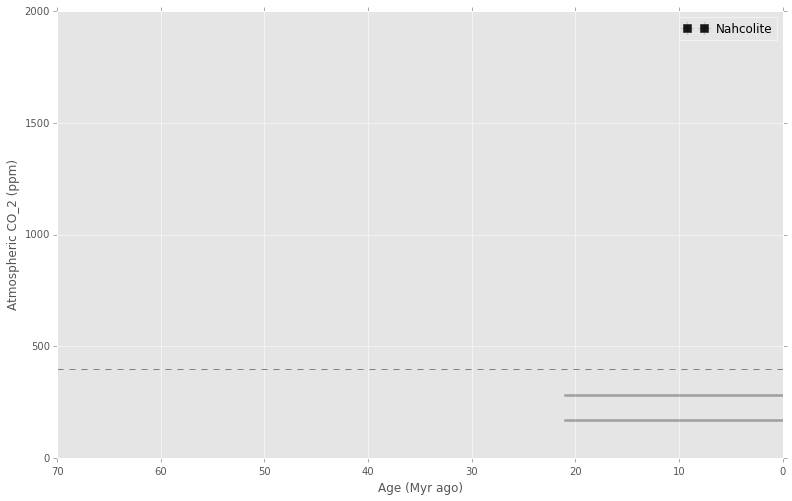

In [21]:
print cenozoicco2_np_final[38:40,3:4]
print cenozoicco2_np_final[38:40,6:7]

fig, ax = plt.subplots(figsize=(13,8))
#ax.errorbar(cenozoicco2_np_final[0:17,2], cenozoicco2_np_final[0:17,5], \
#            xerr=cenozoicco2_np_final[0:17,3:4], yerr=cenozoicco2_np_final[0:17,6:7], \
#            ms=8, fmt='+', color='#FF99CC', elinewidth=0.6, capsize=1, ecolor='0.7', \
#            alpha=0.9, label='B/Ca')
#ax.errorbar(cenozoicco2_np_final[17:38,2], cenozoicco2_np_final[17:38,5], \
#            xerr=cenozoicco2_np_final[17:38,3:4], yerr=cenozoicco2_np_final[17:38,6:7], \
#            ms=8, fmt='v', color='#1975FF', elinewidth=0.6, capsize=1, ecolor='0.7', \
#            alpha=0.9, label='Boron')
#ax.errorbar(cenozoicco2_np_final[38:40,2], cenozoicco2_np_final[38:40,5], \
#            xerr=cenozoicco2_np_final[38:40,3:4], yerr=cenozoicco2_np_final[38:40,6:7], \
#            ms=8, fmt='^', color='y', elinewidth=0.6, capsize=1, ecolor='0.7', \
#            alpha=0.9, label='Liverworts')
ax.errorbar(cenozoicco2_np_final[40,2], cenozoicco2_np_final[40,5], \
            xerr=cenozoicco2_np_final[40,3:4], yerr=cenozoicco2_np_final[40,6:7], \
            ms=8, fmt='s', color='k', elinewidth=0.6, capsize=1, ecolor='0.7', \
            alpha=0.9, label='Nahcolite')
#ax.errorbar(cenozoicco2_np_final[41:78,2], cenozoicco2_np_final[41:78,5], \
#            xerr=cenozoicco2_np_final[41:78,3:4], yerr=cenozoicco2_np_final[41:78,6:7], \
#            ms=7, fmt='o', color='0.7', elinewidth=0.6, capsize=1, ecolor='0.7', \
#            alpha=0.9, label='Paleosols')
#ax.errorbar(cenozoicco2_np_final[78:292,2], cenozoicco2_np_final[78:292,5], \
#            xerr=cenozoicco2_np_final[78:292,3:4], yerr=cenozoicco2_np_final[78:292,6:7], \
#            ms=7, fmt='D', color='#B12B2B', elinewidth=0.6, capsize=1, ecolor='0.7', \
#            alpha=0.85, label='Phytoplankton')
#ax.errorbar(cenozoicco2_np_final[292:371,2], cenozoicco2_np_final[292:371,5], \
#            xerr=cenozoicco2_np_final[292:371,3:4], yerr=cenozoicco2_np_final[292:371,6:7], \
#            ms=7, fmt='s', color='#70C670', elinewidth=0.6, capsize=1, ecolor='0.7', \
#            alpha=0.85, label='Stomata')

plt.axhline(y=400, xmin=0, xmax=1, linewidth=1, color = '0.5', ls='dashed')
plt.axhline(y=170, xmin=0.7, xmax=1, linewidth=2.5, color = 'k', alpha=0.3)
plt.axhline(y=280, xmin=0.7, xmax=1, linewidth=2.5, color = 'k', alpha=0.3)
ax.legend()
plt.xlim((70,0)); plt.ylim((0,2000))
plt.xlabel('Age (Myr ago)'); plt.ylabel('Atmospheric CO_2 (ppm)')

NOTE THE ABRUPTNESS OF CURRENT CHANGE RELATIVE TO THE SMOOTH CHANGES OF THE PAST.

If you are interested in reading a good summary of the evolution of the global climate of the Cenozoic (past 65 million years), I suggest reading the highly cited [Zachos review paper](http://www.sciencemag.org/content/292/5517/686.short) pulished in Science in 2001, with a full pdf free version [here](http://cmbc.ucsd.edu/content/1/docs/zachos-2001.pdf). It's a bit technical, but not as much as other papers can be, and if you read it carefully, you may start to understand some of the challenges and insights of paleoclimatology.

### Conclusions

Certain things are now very clear. CO<sub>2</sub> concentrations have been measured in the modern atmosphere since the 1960's at the Mauna Loa observatory in Hawai. The values recorded there are representative of the global average concentration. The trend is increasing at what appears to be an exponential rate and CO<sub>2</sub> concentrations are now about 25% higher than they were in 1960 (from 320ppm in 1960 to 400ppm in 2015). When we look into records of past atmospheric CO<sub>2</sub> values for perspective, the abruptness of the recent increase becomes very obvious. And althought the Earth has probably seen CO<sub>2</sub> values well above the current value, it seems safe to say that the current rate of change is unprecedented. So, we have shown here that, whatever the cause and implication, atmospheric CO<sub>2</sub> is increasing at a rate that has probably never been seen in the Earth's recent history (past 800 000 years) and possibly even in its whole history. Determining the cause of this abrupt change in atmospheric CO<sub>2</sub> would require an in-depth analysis of the carbon cycle. We can look at this in another notebook, but I'm fairly certain that if we do the math, fossil fuel combustion and land use change are the biggest causal factors (see IPCC reports and many other scientific articles). 